<center>
    <img src="./images/ac_header.png">
</center>

### <a target="_blank" rel="noopener noreferrer" href="https://www.tu-ilmenau.de/mt-ams/personen/schuller-gerald/">Prof. Dr. -Ing. Gerald Schuller</a> <br> <a target="_blank" rel="noopener noreferrer" href="https://www.tu-ilmenau.de/mt-ams/lehre/msp-and-adsp-tutorials/">Jupyter Notebook: Renato Profeta</a> 

[Applied Media Systems Group](https://www.tu-ilmenau.de/en/applied-media-systems-group/) <br>
[Technische Universität Ilmenau](https://www.tu-ilmenau.de/)

# Basics of Multirate Signal Processing

In [41]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/Tp96ICZ_pMg?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Audio coders process sampled audio signals. As an input signal, they often have audio signals sampled at e.g. 48kHz or 44.1 kHz, and with 16 bits/sample.

Internally they filter the signal and **down- and up-sample** it with **filter banks**, in the encoder and decoder. Hence before we take a closer look at the filter banks, we first take a short look at the basics of Multirate Signal Processing.

 - https://github.com/GuitarsAI/ADSP_Tutorials
 - https://github.com/GuitarsAI/MRSP_Notebooks

## Sampling, Downsampling, Upsampling, Sampling the Analog Signal, Normalized Frequency

In [24]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/_YclokYvRk4?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
<iframe width="560" height="315" src="https://www.youtube.com/embed/9wODoG_H-jg?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
<iframe width="560" height="315" src="https://www.youtube.com/embed/qqbWmiwMC3Q?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

To see what happens when we sample a signal, lets start with the analog signal s(t). Sampling it means to sample the signal at sample intervals *T*, or the sampling frequency $f_s$. 

Mathematically, sampling can be formulated as **multiplying** the analog signal with a **Dirac impulse** at the sampling time instances **nT**, where *n* is the number of our sample (n=0,… for causal systems). 

If we look at the Fourier transform of an analog time continuous system, we get:

$$\large
S^c(\omega) = \int_{t=-\infty}^{\infty} S(t) \cdot e^{-j\omega t} dt
$$

where the superscript *c* denotes the continuous version, with $\omega=2\pi f.$

If we now compute the Fourier transform for the sampled signal, we get a sum, because the Dirac impulse is not zero only at the sample time instances, and the integral over a Dirac impulse is one:

$$\large
S^d(\omega) = \sum_{n=-\infty}^{\infty} S(nT) \cdot e^{-j\omega nT}
$$

with the superscript *d* now denoting the discrete time version.

Now we can see that the frequency variable only appears as $\omega nT$ , with *T* as the inverse of the sampling frequency. Hence we get:

$$\large
\omega T = \dfrac{\omega}{f_s}=:\Omega
$$

This is now our normalized frequency, where $2\pi$ represents the sampling frequency and $\pi$ is the so-called *Nyquist frequency* (the upper limit of our usable frequency range).

**Important Point:** We have a normalized frequency, normalized to the sampling frequency, where $2\pi$ denotes the sampling frequency, and $\pi$ is the *Nyquist frequency!* (since we have no time units in a sampled sequence).

To indicate that we are now in the discrete domain, we rename our signal to x(n):=s(nT). Its spectrum or frequency response is then calculated with the **Discrete Time Fourier Transform:**

$$\large
X(\Omega) = \sum_{n=-\infty}^{\infty} x(n) e^{-j\Omega n}
$$

Because *n* in the exponent is integer here (no longer real valued like *t*), we get a $2\pi$ periodicity for $X(\Omega)$.

This is the first important property for discrete time signals. The above transform is called the *Discrete Time Fourier* transform (not the Discrete Fourier Transform), which is for finite or periodic discrete time sequences. Here we still have an infinite "block length").

Also observe that for real valued signals, the spectrum of the negative frequencies is the conjugate complex of the positive frequencies:

$$\large
X(-\Omega)=\overline{X(\Omega)}$$
where $\overline{X}$ denotes the conjugate complex operation, because in the sum of our DTFT we have:

$$\large
e^{-j(-\Omega)n}=e^{j\Omega n} = e^{-j\Omega n}$$

### Sampling a Discrete Time Signal

In [25]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/uZFKOUfibt4?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
<iframe width="560" height="315" src="https://www.youtube.com/embed/KeT2i-ARZ7c?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
<iframe width="560" height="315" src="https://www.youtube.com/embed/sB5HRZgqgIg?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

So what happens if we further downsample an already discrete signal x(n), to reduce its sampling rate?

**Downsampling by N** means we only keep every Nth sample and discard every sample in between. Observe that this results in a **normalized frequency which is a factor of N higher**.

This downsampling process can also be seen as first multiplying the signal with a sequence of **unit pulses** (a 1 at each sample position), zeros in between, and later dropping the zeros (just like with the Dirac impulses, but now with 1's instead of the Dirac impulses). This multiplication with the unit pulse train can now be used to mathematically analyse this downsampling, looking at the resulting spectra, first still including the zeros. The frequency response now becomes


$$\large X^d(\Omega)=\sum_{n=mN} x(n)e^{-j \Omega n}$$
$$\large =\sum_{m=- \infty}^ \infty x(mN)e^{-j \Omega mN}$$
for all integers m.

Again we can write down-sampling as a multiplication of the signal with a sampling function. In continuous time it was the sequence of Dirac impulses, here it is a **sequence of unit pulses** at positions of multiples of N,

$$\large 
\delta_N ( n ) = \left ( \matrix {{1 , \text{if n = m N}} \\ {0 , \text{else}}} \right) $$

Then the sampled signal, with the zeros still in it, becomes

$$\large
x^d(n)=x(n)\Delta _N (n)$$

This signal is now an intermediate signal, which gets the zeros removed before transmission or storage, to reduce the needed data rate. The decoder upsamples it by re-inserting the zeros to obtain the original sampling rate.

Observe that this is then also the signal  that we obtain after this upsampling in the decoder. Hence this signal looks interesting to us, because it appears in the encoder and also in the decoder.

What does its spectrum or **frequency response** look like?

We saw that the downsampled signal $x^d(n)$ can be written as the multiplication of the original signal with the unit pulse train $\delta_N(n)$. 

In the spectrum or frequency domain this becomes a convolution with their Fourier transforms. The Fourier transform of the unit pulse train is a Dirac impulse train. But that is not so easy to derive, so we just apply a simple trick, to make it mathematically more easy and get converging sums. We have a guess what the Fourier transform of the unit pulse train is: we get Dirac impulses at frequencies of $\large \frac{2\pi}{N}k.$

Remember that the inverse Discrete Time Fourier transform is:

$$\large
\delta_N(n) = \dfrac{1}{2\pi} \int_0^{2\pi} \Delta(\Omega)e^{jn\Omega}d\Omega$$

where
$\large
\Delta(\Omega)=\dfrac{2\pi}{N}\sum_{k=0}^{N-1}\delta \left(\dfrac{2\pi}{N}k \right)$ is the Fourier transform of the unit pulse train.

We can now apply the inverse Fourier transform to our guess, and use it in the time domain:

$$\large
\delta_N(n) = \dfrac{1}{N} \sum_{k=0}^{N-1}e^{j\frac{2\pi}{N}kn}
$$

Here we get $c=e^{j\frac {2 \pi}{N}n}$, and the sum can hence be computed in a closed form:

$$ \large
 \sum _{k = 0}^{N - 1} {e^{j \frac{2 π} { N} \cdot n \cdot k} } =\frac{e^{j \frac{2  π} { N} \cdot n \cdot N} - 1}  {e^{j \frac{2  π} {N }\cdot n} - 1}
$$

Now we have to prove that this is indeed true (since we only applied a guess). To do that, we can look at the sum. It is a geometric sum (a sum over a constant with the summation index in the exponent):

$S= \sum _{k = 0} ^ {N - 1} c^k$ , $S \cdot c = \sum _{k = 1} ^ N c^k$ , $S c -S =c^N -1$, hence we get:

$$S =\frac{c^N - 1}  {c - 1}$$

In order to get our unit pulse train, this sum must become N for n=mN. We can check this by simply plugging this into the sum. The right part of the sum is undefined in this case (0/0), but we get an easy result by looking at the left hand side: $e^{j \frac{2 π}{N} \cdot m N \cdot k} =1$. Hence the sum becomes N, as desired!<br>
For $n  \neq m N$ we need the sum to be zero. Here we can now use the right hand side of our equation. The denominator is unequal zero, and the numerator becomes zero, and hence the sum is indeed zero, as needed!

This proves that our **assumption was right**. Now we can use this expression for the unit pulse train in the time domain and compute the Fourier transform,

$$ \large
x^d \left ( n \right )  =x \left ( n \right )  \cdot \Delta_N \left ( n \right ) $$

$$\large
=x  ( n  ) \cdot \frac{1}{N}  \sum _ {k = 0} ^{N - 1} e^{j \frac{2 π} {N} \cdot k \cdot n}
$$

Taking its Discrete Time Fourier transform now results in

$$\large
X^d \left ( \Omega \right )  = \sum _ {n = - \infty} ^ \infty {x(n) \cdot} \frac{1}{ N}  \sum _ {k = 0} ^{N - 1} e^{j \frac{2\pi}{ N}\cdot k \cdot n} \cdot e^{- j\Omega n} = $$

$$\large
=\frac{1} { N}  \sum _ {k = 0}^ {N - 1}\sum _{n=-\infty}^{\infty} {x  ( n )\cdot e^{-j\left(- \frac{2\pi}{N}\cdot k +\Omega\right)\cdot n}}$$

$$\large
=\frac{1} {N}  \sum _{k = 0} ^{N - 1} {X  \left(  - \frac{2 \pi}{ N} k + \Omega  \right)}
$$

We see, that sampling, still including the zeros, leads (in the frequency domain) to **multiple shifted versions of the signal spectrum**, the so-called **aliasing components** (N-1 aliasing components):

$$\large
\begin{equation}
X^d (\Omega)= \frac{1} {N} \sum _{k=0} ^{N-1} X \left(- \frac{2 \pi}{N} \cdot k + \Omega\right)
\end{equation}$$

**In conclusion:** Sampling a signal by a factor of N, with keeping the zeros between the sample points, leads to N-1 aliasing components.

**Example:**

Make a sine wave which at 44100 Hz sampling rate has a frequency of 400 Hz at 1 second duration. Hence we need 44100 samples, and 400 periods of our sinusoid in this second. Hence we can write our signal in Python as:

In [26]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/GpiB5cDa5to?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
fs = 44100
f = 400.0
s=np.sin(2*np.pi*f*np.arange(0,1,1.0/fs))

In [5]:
import IPython.display as ipd
ipd.Audio(s, rate=fs)

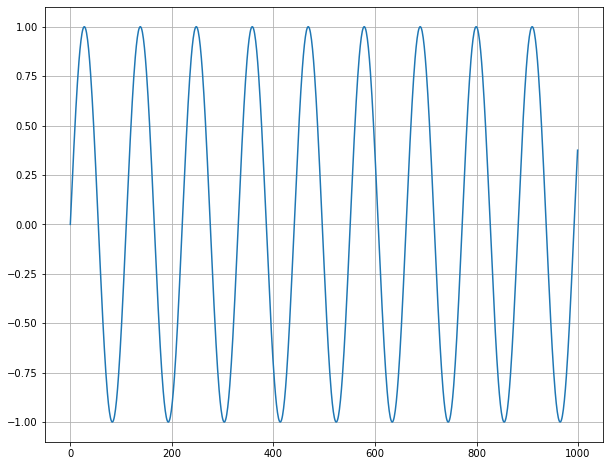

In [6]:
# Plot the first 1000 samples
plt.figure(figsize=(10,8))
plt.plot(s[0:1000])
plt.grid()

Now we can multiply this sine tone signal with a unit pulse train, with N=8.
We use an **indexing trick** to get the desired result of only keeping every 8th sample and having zeros in between:

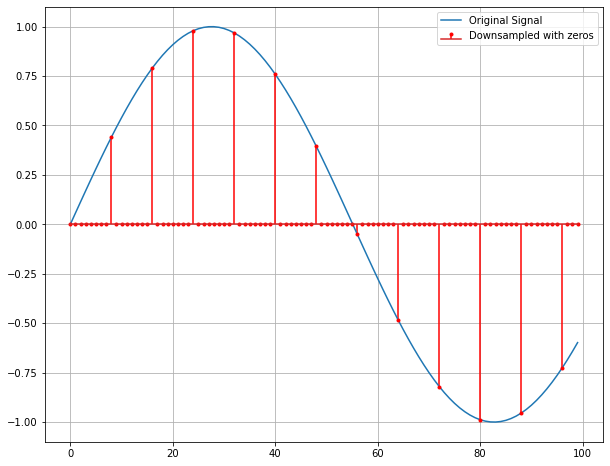

In [7]:
import matplotlib.pyplot as plt
sdu = np.zeros(44100)
sdu[0::8]=s[0::8]

# Now plot the result, the first 100 samples:
plt.figure(figsize=(10,8))
plt.plot(s[0:100], label='Original Signal')
plt.stem(sdu[0:100],linefmt='r',markerfmt='r.', use_line_collection=True, label='Downsampled with zeros')
plt.legend()
plt.grid()

Now take a look at the spectrum of the original signal s:

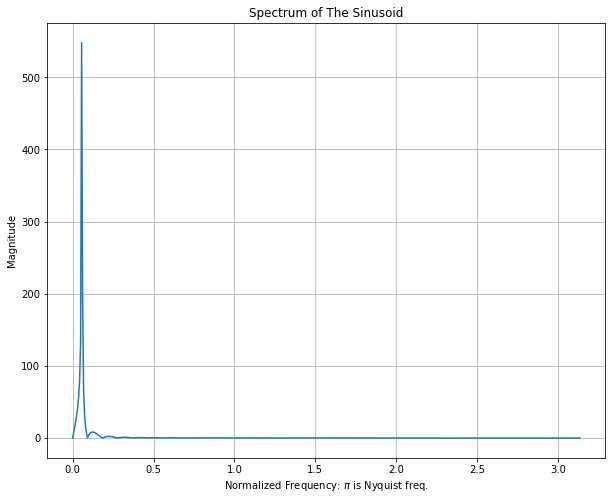

In [8]:
from scipy.signal import freqz
w,H=freqz(s)
plt.figure(figsize=(10,8))
plt.plot(w, abs(H)+1e-3)
plt.xlabel('Normalized Frequency: $\pi$ is Nyquist freq.')
plt.ylabel('Magnitude')
plt.title('Spectrum of The Sinusoid')
plt.grid()

The plot shows the magnitude of the frequency spectrum of our signal. Observe that the frequency axis (horizontal) is a *normalized* frequency, normalized to the Nyquist frequency as $\pi$, in our case 22050 Hz. Hence our sinusoid should appear as a peak at normalized frequency 400.0/22050*pi=0.05699, which we indeed see.
 
Now we can compare this to our signal with the zeros, sdu:

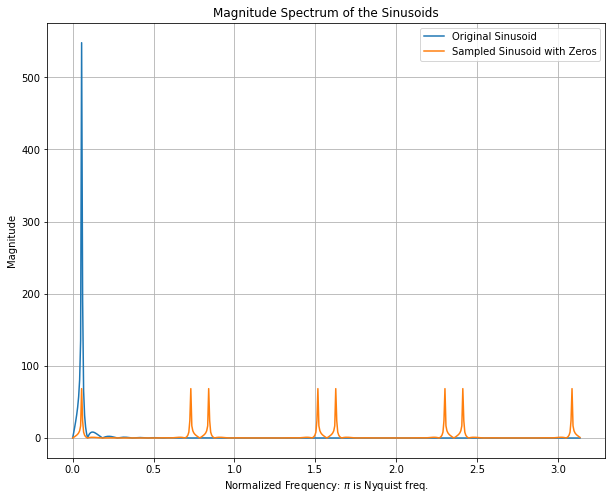

In [9]:
plt.figure(figsize=(10,8))
w,H=freqz(s)
plt.plot(w, abs(H))
plt.xlabel('Normalized Frequency: $\pi$ is Nyquist freq.')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of the Sinusoids')

w,H=freqz(sdu)
plt.plot(w, abs(H))
plt.legend(('Original Sinusoid','Sampled Sinusoid with Zeros'))
plt.grid();

Here we can see the original line of our 400 Hz tone, and now also the 7 new aliasing components. Observe that always 2 aliasing components are close together. This is because the original 400 Hz tone also has a spectral peak at the negative frequencies, at -400 Hz, or at normalized frequency -0.05699.

Often, the small magnitude components on this plot are also interesting, for that reason magnitude frequency responses are usually plotted on a logarithmic Decibel (dB) scale, applying the function 20*log10(.) to it,

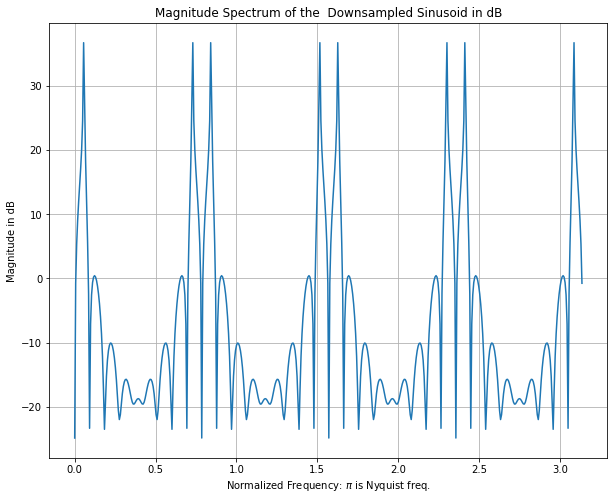

In [10]:
plt.figure(figsize=(10,8))
w,H=freqz(sdu)
plt.plot(w, 20*np.log10(abs(H)))
plt.xlabel('Normalized Frequency: $\pi$ is Nyquist freq.')
plt.ylabel('Magnitude in dB')
plt.title('Magnitude Spectrum of the  Downsampled Sinusoid in dB')
plt.grid()

Observe that the small magnitudes become much more visible.

Now also listen to the signal with the zeros:

In [11]:
import IPython.display as ipd
ipd.Audio(sdu, rate=44100)

Here you can hear that it sounds quite different from the original, because of the string of aliasing components!

### Real-Time Python Example

*Note: Real-Time Audio Examples don't work inside cloud environments such as Google Colab and Binder.*

In [27]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/hbIQOeD4N2k?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

**Python** real time audio **example**: This example takes the microphone input and samples it, without removing the zeros, and plays it back the the speaker in real time.

It constructs a unit pulse train, with a 1 at every N'th sample, using the modulus function „%“, 

```s=(np.arange(0,CHUNK)%N)==0```

Here you can hear the microphone signal as it is sampled at 32 kHz sampling rate, and then multiplied with a unit pulse train, and then played out, again at 32 kHz sampling rate. 

Observe: you can hear the high frequency aliasing artifacts, which sound a little like ringing. You can play with the script and see how the sound changes when you change the downsampling rate "N" in the script.

In [12]:
"""
PyAudio Example: Make a sampling between input and output 
(i.e., record a few samples, multiply them with a unit pulse train,
and play them back immediately).
Using block-wise processing instead of a for loop
Gerald Schuller, Octtober 2014

Updated and Ported to Jupyter Notebooks by: Renato Profeta, November 2019
"""

import time
import numpy as np
from pyaudio import PyAudio, paFloat32, paContinue, paInt16, paComplete
from ipywidgets import ToggleButton, Checkbox
import threading

sampling_on=False

button_stop= ToggleButton(description='Stop')
box_sampling = Checkbox(False, description='Downsampling with Zeros')

def on_button_stop(change):
    if change['new']==True:
        stream.stop_stream()
        stream.close()
        pa.terminate()
        button_stop.disabled=True
        print('PyAudio terminated...')
button_stop.observe(on_button_stop, 'value')
display(button_stop)

def box_sampling_changed(box_sampling):
    global SamplingOn
    if box_sampling['new']: 
        SamplingOn=True
    else:
        SamplingOn=False       
box_sampling.observe(box_sampling_changed, names='value')
display(box_sampling)

N=8
s=(np.arange(0,1024)%N)==0
SamplingOn=False


def callback(in_data, frame_count, time_info, flag):
    global SamplingOn
    audio_data = np.frombuffer(in_data, dtype=np.int16)
    audio_data_s = audio_data
    if SamplingOn:
        audio_data_s=audio_data*s
    if button_stop.value==True:
        return (audio_data_s, paComplete)
    return (audio_data_s, paContinue)

pa = PyAudio()

stream = pa.open(format = paInt16,
                 channels = 1,
                 rate = 32000,
                 output = True,
                 input = True,
                 frames_per_buffer = 1024,
                 stream_callback = callback)


def keep_alive(button_stop):
    while stream.is_active():
        if button_stop.value==True:
            break
        time.sleep(0.1)

# Create a Thread for run_spectrogram function
thread = threading.Thread(target=keep_alive, args=(button_stop,))
stream.start_stream()
thread.start()

ToggleButton(value=False, description='Stop')

Checkbox(value=False, description='Downsampling with Zeros')

PyAudio terminated...


## Removing the Zeros

In [28]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/XGKfAm1-Mek?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

The final step of downsampling is now to omit the zeros between the samples, to obtain the lower sampling rate. Let's call the signal without the zeros  $y(m)$ where the time index m denotes the **lower sampling rate** (as opposed to n, which denotes the higher sampling rate). 

In our Python example this is:

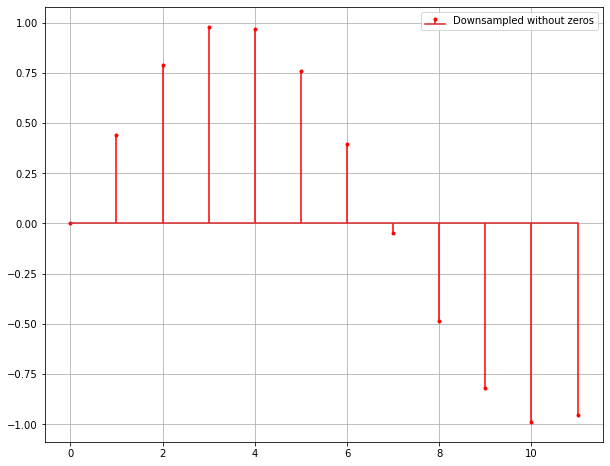

In [13]:
sd = sdu[0:44100:8]
plt.figure(figsize=(10,8))
plt.stem(sd[0:int(100/8)],linefmt='r',markerfmt='r.', use_line_collection=True, label='Downsampled without zeros')
plt.legend()
plt.grid();

Observe that here we only have $\frac{100}{8}\approx 12$ samples left.

How are the frequency responses or spectra of $y(m)$ and $x^d(n)$ connected? 

We can simply take the Fourier transforms of them,

$$ \large
X^d (\Omega)=\sum _ {n=- \infty}^ \infty x^d (n) \cdot  e^{-j \Omega n} 
$$

still with the zeros in it. Hence most of the sum contains only zeros. Now we only need to let the sum run over the non-zeros entries (only every Nth entry), by replacing n by mN, and we get

$$ \large
X^d (\Omega)=\sum _ {n=mN} x^d (n) \cdot  e^{-j \Omega n} 
$$

for all integer m, now without the zeros. Now we can make the connection to the Fourier transform of y(m), by making the index substitution m for n in the sum,


$$ \large
X^d (\Omega)= \sum _{m=- \infty} ^ \infty y(m) \cdot  e^{-j \Omega \cdot N m} = Y(\Omega \cdot N) 
$$

This is now our result. It shows that the downsampled version (with the removal of the zeros), has the same frequency response, but the frequency variable $\Omega$ is scaled by the factor N. 

For instance, the normalized frequency $\pi /N$ before downsampling becomes $\pi$ after removing the zeros! It shows that a **small part of the spectrum before downsampling becomes the full usable spectrum after downsampling.**

Observe that we don't loose any frequencies this way, because by looking at eq. (1) we see that we obtain multiple copies of the spectrum in steps of $2\pi /N$, and hence the spectrum already has a periodicity of $2\pi /N$. This means that the spectrum between $-\pi/N$ and $\pi/N$ for instance (we could take any period of length $2\pi /N$) contains a unique and full part of the spectrum, because the rest is just a periodic continuation. 

We can now take a look at the spectrum with :

Observe that the sine signal now appear at normalized frequency of 0.455, a **factor of 8 higher** than before, with the zeros in it, because we **reduced the sampling rate by 8**. 

This is because we now have a new Nyquist frequency of 22050/8 now, hence our normalized frequency becomes $400*3.14 / 22050.8 \approx 0.455$. This means removing the zeros scales or stretches our frequency axis.

    
Observe that in our time-domain plot, we only have $100/8 \approx12$ samples left.

This can be seen in following pictures,

<center>
    <img src='./images/lecture6-6.png' width='700'>
    Figure: The magnitude spectrum of a signal. The 2 boxes symbolize the passband of an ideal bandpass, here a high pass.
    <img src='./images/lecture6-8.png' width='700'>
    Figure: The signal spectrum after passing through the high pass. 
    <img src='./images/lecture6-7.png' width='700' >
    Figure: Signal spectrum after multiplication with the unit pulse train, for N=2, hence setting every second value to zero (the zeros still in the sequence). Observe that we shift and add the signal by multiples of $2\pi /2=\pi$, and in effect we obtain „mirrored“ images of the high frequencies to the low frequencies (since we assume a real valued signal). Observe that the mirrored spectra and the original spectrum don't overlap, which makes reconstruction easy.
    <img src='./images/lecture6-9.png' width='700'>
    Figure: Signal spectrum after downsampling (removing the zeros) by N (2 in this example). Observe the stretching of the spectrum by a factor of 2. 
</center>

**In conclusion:** Removing the N-1 zeros between samples stretches the spectrum of the signal by a factor of N.

## Upsampling

In [30]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/Ow_FOJS82gc?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
<iframe width="560" height="315" src="https://www.youtube.com/embed/bIYXoAUISNs?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

What is still missing in our system is the upsampling, as the opposite operation of downsampling, for the case where we would like to increase our sampling rate. One of the first (**wrong!**) approaches to upsampling that often comes to mind if we want to do upsampling by a factor of N, is to simply repeat every sample N-1 times. 

**But** this is equivalent to first inserting N-1 zeros after each sample, and then filter the resulting sequence by a **low pass** filter with an impulse response of N ones. This is a very special case, and we would like to have a more general case. 

In our case, we actually a high pass filter, not a low pass. Hence we assume that we upsample by always first inserting N-1 **zeros** after each sample, and then have some interpolation filter for it (can also be a **high or band pass**, as needed to reconstruct a signal).

Again we take the signal at the lower sampling rate as $y(m)$, with index m for the lower sampling rate, and the signal at the higher sampling rate, with the zeros in it, as $x^d(n)$ with index n for the higher sampling rate. Here we can see that this is simply the reverse operation of the final step of removing the zeros for the downsampling.

Hence we can take our result from downsampling and apply it here:

$$X^d(\Omega)=Y(\Omega \cdot N)$$
$$or$$
$$X^d(\Omega /N)=Y(\Omega )$$

We are now just coming from y(m), going to the now upsampled signal $x^d(n)$.

For instance if we had the frequency $\pi$ before upsampling, it becomes $\pi /2$ for the upsampled signal, if we have N=2. In this way we now get an „extended“ frequency range.

Since the spectrum before upsampling was also $2\pi$ periodic, the extra spectrum we obtain contains a periodic continuation of our spectrum, which again is aliasing, which we would like to supress using filters (lowpass or bandpass) after upsampling.

We saw the effects of downsampling and upsampling. Observe that we can perfectly reconstruct the high pass signal in our example if we use ideal filters, using upsampling and ideal high pass filtering.

In this way we have for the analysis and synthesis the following picture:

<center>
    <br>
    <img src='./images/lecture6-10.png' width='700'>
</center>

Observe that we **violate the conventional Nyquist** criterium, because our high pass passes the high frequencies. But then the sampling **mirrors** those frequencies **to the lower range**, such that we can apply the traditional Nyquist sampling theorem. This method is also known as bandpass Nyquist. This is an important principle for filter banks and wavelets. It says that we can perfectly reconstruct a bandpass signal in a filter bank, if we sample with twice the rate as the **bandwidth** of our bandpass signal (assuming ideal filters, to avoid spectral overlap of aliasing components).

## Effects in the z-Domain

In [34]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/e1xQJDLMHHE?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

The z-Transform is a more general transform than the Fourier transform, and we will use it to obtain perfect reconstruction in filter banks and wavelets. Hence we will now look at the effects of sampling and some more tools in the z-domain.

Since we usually deal with causal systems in practice, we use the 1-sided z-Transform, defined as

$$\large
X(z)=\sum _{n=0} ^ {\infty} x(n)z^{-n} 
$$

Observe that a multiplication of the z-transform with $z^{−1}$ can be interpreted as a delay of the signal by 1 sample. It can be implemented as a delay or memory element.

First observe that we get our usual frequency response (the Discrete Time Fourier Transform) if we evaluate the z-tranform along the unit circle in the z-domain,

$$\large
z=e^{j\Omega}
$$

What is now the effect of **multiplying our signal with the unitpulse** train in the z-domain? To see this we simply apply the z-transform, and use our sum formulation for the delta impulse train, 

$$\large
X^d(z)=\sum_{n=0} ^ {\infty} x(n) \Delta_N(n) z^{-n} 
$$

Using (see: Lecture ADSP, Slides 06)
$$\large
\Delta_N(n)= \frac{1} {N } \sum_{k = 0} ^ {N - 1} e^{j \frac{2 π} {N} ∙ k ∙ n}
$$

this becomes

$$\large
\frac{1}{N} \sum_{k=0} ^ {N-1} \sum _{n=0} ^\infty x(n) (e^{-j \frac{2 \pi}{ N} \cdot k} \cdot z)^{-n} 
$$

$$\large
= \frac{1}{N} \sum_{k=0} ^{N-1} X(e^{-j \frac{2 \pi} {N} \cdot k} \cdot z) 
$$

(using the z-Transform definition and replacing $z$ by $e^{-j \frac{2 \pi} {N} \cdot k} \cdot z$:)

$$\large
X(e^{-j\frac{2\pi} {N} \cdot k} \cdot z)=\sum _ {n=0} ^\infty x(n)(e^{-j\frac{2\pi}{N} \cdot k} \cdot z)^{-n} 
$$

or, in short,

$$\large
X^d(z)=\frac{1} {N} \sum_ {k=0 }^{N-1} X( e^{-j \frac{2 \pi} {N} \cdot k} \cdot z)
$$

This is very similar to the Discrete Time Fourier transform formulation. We get a sum with aliasing components, just that we now don't have frequency shifts for the aliasing terms, but a **multiplication of their exponential functions** to z. Here we effectively shift the phase (or use rotation) of the complex number $z$ using this complex expoential. This also makes sense since the frequency information is contained in the phase of $z$, which we see if we replace $z=e^{j\Omega}$.


The next effect is the **removal or re-insertion of the zeros** from or into the signal. Let's again use our definition $y(m)=x^d(mN)$, meaning the y(m) is the signal without the zeros. Then the z-transform becomes,

$$\large
Y(z)=\sum _{ m=0} ^ \infty y(m) z^{-m}=$$

$$\large
=\sum _{m=0} ^\infty x^d(mN)z^{-m} 
$$

Replacing the sum index m (the lower sampling rate) by the higher sampling rate n=mN, and observing that the sequence $x^d(n)$ contains the zeros, with $x^d(n)=0$ for $n\neq mN$, this results in (using the index substitution $n=mN$)

$$\large
=\sum_{n=0} ^ \infty x^d(n) z^{-n/N} =
\sum_{n=0} 
^\infty x^d(n) (z^{1/N})^{-n}= X^d(z^{1/N})
$$

### Modulation

In [35]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/qtwHRFxaGjo?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Another very useful tool, is the **modulation**. This is the **multiplication** of our signal with a periodic function, for instance an exponential function. It can be written as

$$\large
x_M(n):=x(n) \cdot  e^{-j \Omega_M \cdot n}
$$

(where "M" denotes the modulation). Observe that the modulation function here has a periodicity of $2 \pi/\Omega_M$. Its z-transform hence becomes

$$\large
X_M(z)=\sum_ {n=0}^ \infty x(n) \cdot e^{-j\Omega_M \cdot n} \cdot z^{-n}
$$

$$\large
X_M(z)=X( e^{j\Omega_M} \cdot z)
$$

here again we have this rotation (or phase shift) of z by an exponential factor.

Observe that this has the effect of simply shifting the frequency response by $Ω_M$ , which can be seen by simply replacing z by $e^{j\Omega}$ to obtain the frequency response.

### Python example to modulating a speech signal:

*Real-Time examples will not work inside cloud environments such as Google Colab and Binder*

In [42]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/UvYIekLpnE4?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [37]:
"""
PyAudio Example: Make a modulation between input and output (i.e., record a
few samples, modulate them with a sine, and play them back immediately).
Using block-wise processing instead of a for loop
Gerald Schuller, Octtober 2014

Updated and Ported to Jupyter Notebooks by: Renato Profeta, July 2020
"""

import time
import numpy as np
from pyaudio import PyAudio, paFloat32, paContinue, paInt16, paComplete
from ipywidgets import ToggleButton, Checkbox
import threading

sampling_on=False

button_stop= ToggleButton(description='Stop')
box_sampling = Checkbox(False, description='Modulation')

def on_button_stop(change):
    if change['new']==True:
        stream.stop_stream()
        stream.close()
        pa.terminate()
        button_stop.disabled=True
        print('PyAudio terminated...')
button_stop.observe(on_button_stop, 'value')
display(button_stop)

def box_sampling_changed(box_sampling):
    global SamplingOn
    if box_sampling['new']: 
        SamplingOn=True
    else:
        SamplingOn=False       
box_sampling.observe(box_sampling_changed, names='value')
display(box_sampling)

s=np.sin(np.pi/128*4*np.arange(0,1024))
SamplingOn=False


def callback(in_data, frame_count, time_info, flag):
    global SamplingOn
    audio_data = np.frombuffer(in_data, dtype=np.int16).astype('float')
    audio_data_s = audio_data
    if SamplingOn:
        audio_data_s=audio_data*s
    if button_stop.value==True:
        return (audio_data_s.astype('int16'), paComplete)
    return (audio_data_s.astype('int16'), paContinue)

pa = PyAudio()

stream = pa.open(format = paInt16,
                 channels = 1,
                 rate = 32000,
                 output = True,
                 input = True,
                 frames_per_buffer = 1024,
                 stream_callback = callback)


def keep_alive(button_stop):
    while stream.is_active():
        if button_stop.value==True:
            break
        time.sleep(0.1)

# Create a Thread for function
thread = threading.Thread(target=keep_alive, args=(button_stop,))
stream.start_stream()
thread.start()

ToggleButton(value=False, description='Stop')

Checkbox(value=False, description='Modulation')

PyAudio terminated...


In [43]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/upoWSbQ4ZA4?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

An intersting case is obtained if we set $\Omega_M=\pi$. Then the modulating function is just a sequence of +1,-1,+1,..., and multiplying this with our signal results in a frequency shift of $\pi$ . If we have a real valued low pass signal, for instance, this will then be shifted by $\pi$ , and we will obtain a high pass. In this
way we can turn the impulse response of a low pass into a high pass, vice versa.

<center>
    <br>
    <img src='./images/ac_01_modulation.png' width='800'>
</center>

Another important tool is the **reversal of the ordering** of a finite length signal sequence, with length L (meaning x(n) is non-zero only for n=0,... , L−1 ):

$$\large
x_r(n):=x(L-1-n)$$

Its z-transform is:

$$\large
X_r(z) = \sum_{n=0}^{\infty}x(L-1-n)\cdot z^{-1}$$

we can now reverse the order of the summation (of course without affecting the result) by starting at the highest index, going to the lowest, replacing the index n by the expression L−1−n' (index substitution):

$$\large
X_r(z)=\sum_{n'=0}^{\infty} x(n') \cdot z^{-(L-1-n')} = z^{-(L-1)}\cdot X(z^{-1})$$

or, in short,

$$\large
X_r(z) = z^{-(L-1)}\cdot X(z^{-1})$$

So what we obtain is the inverse of z in the z-transform (which signifies the time reversal), and a factor of $z^{-(L-1)}$, which is simply a delay of L-1 samples!

## Mid-rise and Mid-tread quantization

In [39]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/XagP9ixzRAg?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
<iframe width="560" height="315" src="https://www.youtube.com/embed/qgFSD5fKPaE?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Depending on if the quantizer has the input voltage 0 at the center of a quantization interval or on the boundary of that interval, we call the quantizer a mid-tread or a mid rise quantiser, as illustrated in the following picture:

<center><img src="./images/rise_tread_quantizers.png"></center>
<font size="2">      
(From:http://eeweb.poly.edu/~yao/EE3414/quantization.pdf)
</font>

Here, $Q_i(f)$ is the index after quantization (which is then encoded and sent to the receiver), and Q(f) is the de-quantization, which produces the quantized reconstructed value at the receiver. Q is the quantization step size, which is identical to $\Delta$ in the plots.

We define the difference between the reverse quantized (through encoder and decoder) and the original signal ( e=Q(f )−f ) as **"quantization error".**

The resulting quantisation error power in both cases is:

$$ \large E(e^2)=\frac{\Delta^2}{12} $$


In [40]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/gSf8irnoW98?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [18]:
"""
PyAudio Example: Make a quantization between input and output 
(i.e., record a few samples, quatize them with a mid-tread or 
mid-rise quantizer, and play them back immediately).
Using block-wise processing instead of a for loop
Gerald Schuller, Octtober 2014

Modified to Jupyter Notebook by Renato Profeta, October 2019
"""
# Imports
import pyaudio
import struct
import numpy as np
from ipywidgets import ToggleButton, Dropdown, Button, BoundedIntText, Label
from ipywidgets import HBox, interact
import threading

# Parameters
CHUNK = 5000 #Blocksize
FORMAT = pyaudio.paInt16 #conversion format for PyAudio stream
CHANNELS = 1 
RATE = 32000  #Sampling Rate in Hz


# Quantization Bit-Depth
N=8
quant_type='Mid-Tread'


# Quantization Application
def quantization_example(toggle_run):
    global N, quant_type
    while(True):
        if toggle_run.value==True:
            break
        #Reading from audio input stream into data with block length "CHUNK":
        data_stream = stream.read(CHUNK)
        #Convert from stream of bytes to a list of short integers
        #(2 bytes here) in "samples":
        shorts = (struct.unpack( 'h' * CHUNK, data_stream ));
        samples=np.array(list(shorts),dtype=float);

        #start block-wise signal processing:
        q=int((2**15-(-2**15))/(2**N))
        
        if quant_type=='Mid-Tread':
            #Mid Tread quantization:
            indices=np.round(samples/q)
            #de-quantization:
            samples=indices*q
        else:
            #Mid -Rise quantizer:
            indices=np.floor(samples/q)
            #de-quantization:
            samples=(indices*q+q/2).astype(int)
            #end signal processing

        #converting from short integers to a stream of bytes in "data":
        #play out samples:
        samples=np.clip(samples, -2**15,2**15)
        samples=samples.astype(np.int16)
        data=struct.pack('h' * len(samples), *samples);
        #Writing data back to audio output stream: 
        stream.write(data, CHUNK)

# GUI
toggle_run = ToggleButton(description='Stop')
button_start = Button(description='Start')
dropdown_type = Dropdown(
    options=['Mid-Tread', 'Mid-Rise'],
    value='Mid-Tread',
    description='Quantization Type:',
    disabled=False,
)
bitdepth_int = BoundedIntText(
    value=8,
    min=2,
    max=16,
    step=1,
    description='Bit-Depth:',
    disabled=False
)

q=int((2**15-(-2**15))/(2**N))
stepsize_label = Label(value="Stepsize: {:d}".format(q))

def start_button(button_start):
    thread.start()
    button_start.disabled=True
button_start.on_click(start_button)


def on_click_toggle_run(change):
    if change['new']==False:
        stream.stop_stream()
        stream.close()
        p.terminate()
        plt.close()
toggle_run.observe(on_click_toggle_run, 'value')

def inttext_bitdepth_changed(bitdepth_int):
    global N, q
    if bitdepth_int['new']: 
        N=bitdepth_int['new']
        stepsize_label.value="Stepsize: {:d}".format(int((2**15-(-2**15))/(2**N)))
bitdepth_int.observe(inttext_bitdepth_changed, names='value')

def dropdown_type_changed(dropdown_type):
    global quant_type
    if dropdown_type['new']:
        quant_type=dropdown_type['new']
dropdown_type.observe(dropdown_type_changed, names='value')


box_buttons = HBox([button_start,toggle_run])
box_controls = HBox([bitdepth_int, dropdown_type,stepsize_label])

# Create a Thread for run_spectrogram function
thread = threading.Thread(target=quantization_example, args=(toggle_run,))

# Start Audio Stream
# Create 
p = pyaudio.PyAudio()
    
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                output=True,
                frames_per_buffer=CHUNK)



input_data = stream.read(CHUNK)
samples = np.frombuffer(input_data,np.int16)

display(box_buttons)
display(box_controls)

Observe: Both quantizers distort the signal audibly.

The mid-tread quantizer does not let small signals through, it rounds them to zero, which also saves bits. The mid-rise quantizer does let small signals through, since it quantizes small values either to Q/2 or -Q/2, but distorted, and it also cost some bit rate, since these values need to be encoded.

In General you want to make the quantization step size bigger to save bit rate, but only big enough to avoid audible distortions.